In [81]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from PIL import Image, ImageFilter

In [90]:
img = Image.open('image022.jpg')

In [91]:
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("img2.png", "PNG")

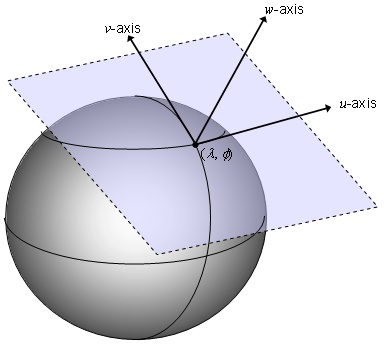

In [92]:
img

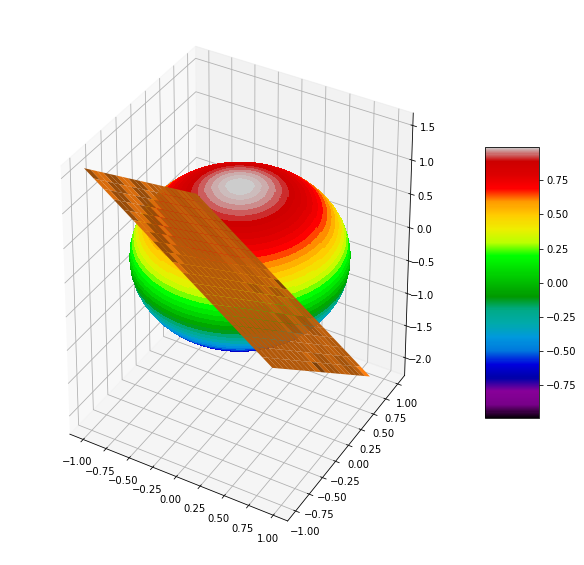

In [79]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

u, v = np.mgrid[0:np.pi:50j, 0:2*np.pi:50j]

strength = u
norm=colors.Normalize(vmin = np.min(strength),
                      vmax = np.max(strength), clip = False)

x = 1 * np.sin(u) * np.cos(v)
y = 1 * np.sin(u) * np.sin(v)
z = 1 * np.cos(u)

point  = np.array([-0.8, -0.6, 1])
normal = np.array([2,2,2])
d = -point.dot(normal)
xx, yy = np.meshgrid(np.arange(-1,1,0.1), np.arange(-1,1,0.1))
zz = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]


surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.spectral,
                       linewidth=0, antialiased=False,)



plane = ax.plot_surface(xx,yy,zz)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
xy = np.array([[330, -80],[410, -80], [340, -120], [400, -120],
             [310, -150],  
              ])
x = xy.T[0]
y = xy.T[1]

In [102]:
n = len(xy)

In [117]:
mat = np.random.randint(1,100, size = (n,n))

In [122]:
treshold = np.percentile(mat, 50)
treshold

43.0

In [123]:
new_mat = np.where(mat >= treshold, mat, 0)
new_mat2 = np.log(mat)

In [124]:
new_treshold = np.percentile(new_mat2, 70)

In [133]:
c = ['b','g','r','c','m','y','k']

In [156]:
_l = [1,3,5,7,8,3,1,15]

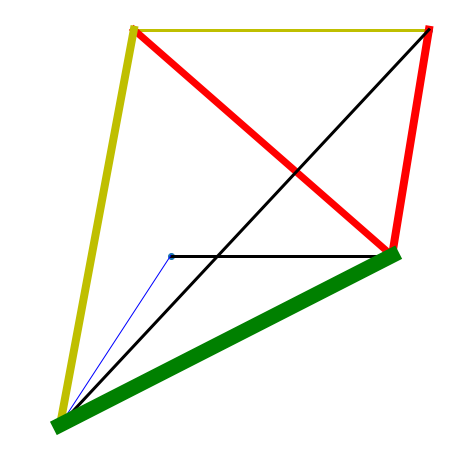

In [157]:
# VERTICES
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(xy.T[0], xy.T[1], cmap='Accent')
plt.axis('off');
#plt.title('louvian')
i, j = np.triu_indices(n, k = 1)

# EDGES
for u,v in zip(i,j):
        if new_mat[u,v] > 0:
#             if new_mat2[u,v] > new_treshold:
#                 l = np.random.uniform()*new_mat2[u,v]
#             else:
#                 l = np.random.uniform()* new_mat2[u,v]
            l = _l[u+v]
            cl = c[np.random.randint(0,len(c))]
            plt.plot(x[[u,v]],y[[u,v]], linewidth = l, color = cl)

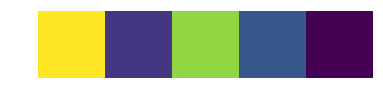

In [139]:
plt.axis('off');
plt.imshow(new_mat.sum(axis=-1).reshape(1,n));


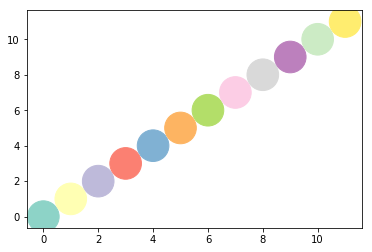

In [236]:
cl = [color[4], color[5], color[2], color[3], color[11], color[7], color[8], color[0]]

cmap = plt.cm.get_cmap('Set3')

color = np.array(list(cmap.colors))

len(color)

plt.scatter(range(len(color)),range(len(color)),s = 1000,c = color)

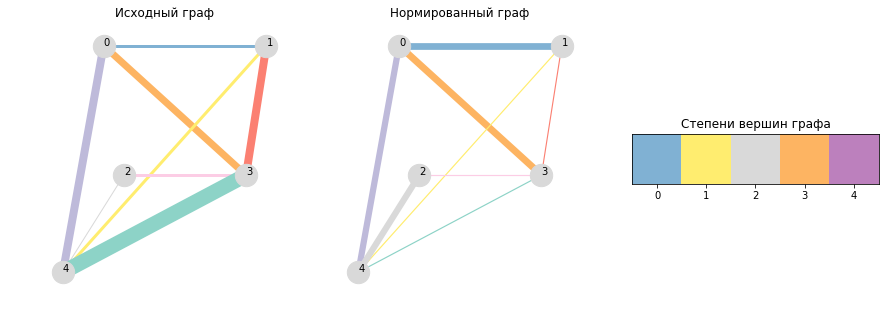

In [270]:
# VERTICES
figure, ax = plt.subplots(1,3, figsize= (15,5))


#plt.title('louvian')
i, j = np.triu_indices(n, k = 1)

# EDGES
k = 0
for u,v in zip(i,j):
        if new_mat[u,v] > 0:
            l = _l[u+v]
            ax[0].plot(x[[u,v]],y[[u,v]], linewidth = l, color = cl[k], zorder = 1)
            k+=1
ax[0].set_title('Исходный граф')


ax[0].scatter(xy.T[0], xy.T[1],s =500, c=color[8], zorder = 2)
names = [str(i) for i in range(n)]
for i, txt in enumerate(names):
    ax[0].annotate(txt, (x[i], y[i]))

ax[0].axis('off');

new_tresh = np.percentile(new_mat, 70)

i, j = np.triu_indices(n, k = 1)
k = 0

for u,v in zip(i,j):
        if new_mat[u,v] > 0:
            if new_mat[u,v] > new_tresh:
                l = 1.5* new_mat2[u,v]
            else:
                l = 0.3 * new_mat2[u,v]
            ax[1].plot(x[[u,v]],y[[u,v]], linewidth = l,  color = cl[k], zorder = 1)
            k+=1
ax[1].set_title('Нормированный граф')


ax[1].scatter(xy.T[0], xy.T[1],s =500, c=color[8], zorder = 2)
names = [str(i) for i in range(n)]
for i, txt in enumerate(names):
    ax[1].annotate(txt, (x[i], y[i]))

ax[1].axis('off');

degree = np.array([color[4], color[11], color[8], color[5], color[9]])
ax[2].yaxis.set_visible(False)

ax[2].imshow(degree.reshape(1,5,3));

ax[2].set_title('Степени вершин графа')




In [271]:

figure.savefig('pic1.pdf', dpi =1000 )

In [296]:
mat = np.round(np.log(np.random.randint(1,100, size = (94,264))),1)

In [310]:
k = 0
print()
print()
print('                   Нормализованные степени вершин графов :')
print()
for i, one in enumerate(mat):
    if i <=3:
        
        print('пациент ', str(i+1), '  | [', one[0],',',one[1],',',one[2],',',one[3], ', ... ,',one[-3],',', one[-2],',',one[-1],']')
    if i >=90:
        
        print('пациент ', str(i+1),' | [', one[0],',',one[1],',',one[2],',',one[3], ', ... ,',one[-3],',', one[-2],',',one[-1],']')
    if i >3 and i < 90:
        if k < 4:
            k +=1
            print('. . . . . .  | [ . . . . . . . . . . . . . . . . . . . . . . . ]')
print()
print()



                   Нормализованные степени вершин графов :

пациент  1   | [ 2.7 , 3.5 , 3.1 , 4.2 , ... , 2.4 , 4.1 , 4.3 ]
пациент  2   | [ 3.9 , 4.5 , 4.3 , 1.1 , ... , 3.5 , 3.9 , 4.6 ]
пациент  3   | [ 4.0 , 4.0 , 3.7 , 4.0 , ... , 0.7 , 4.6 , 4.5 ]
пациент  4   | [ 1.4 , 3.3 , 4.4 , 4.3 , ... , 4.0 , 4.3 , 4.5 ]
. . . . . .  | [ . . . . . . . . . . . . . . . . . . . . . . . ]
. . . . . .  | [ . . . . . . . . . . . . . . . . . . . . . . . ]
. . . . . .  | [ . . . . . . . . . . . . . . . . . . . . . . . ]
. . . . . .  | [ . . . . . . . . . . . . . . . . . . . . . . . ]
пациент  91  | [ 3.9 , 3.0 , 3.9 , 4.4 , ... , 3.2 , 4.0 , 2.1 ]
пациент  92  | [ 3.2 , 4.5 , 3.3 , 4.1 , ... , 3.4 , 3.3 , 4.3 ]
пациент  93  | [ 4.3 , 4.1 , 2.8 , 2.8 , ... , 4.6 , 3.5 , 2.5 ]
пациент  94  | [ 4.1 , 4.2 , 4.4 , 1.8 , ... , 3.7 , 3.8 , 4.0 ]




In [312]:
from scipy.spatial.distance import pdist
d = pdist(mat)

In [329]:
i,j = np.triu_indices(94, k = 1)
dist = np.zeros((94,94))
dist[i,j] = d
dist = dist + dist.T
dist = np.round(dist, 2)

In [342]:
cov = np.round(mat.dot(mat.T)/100,2)

In [349]:
k = 0
print()
print()
print('         Ковариация между степенями вершин посчитанные с помощью матрицы M :')
print()
for i, one in enumerate(cov):
    if i <=3:
        
        print('пациент ', str(i+1), '  | [', one[0],',',one[1],',',one[2],',',one[3], ', ... ,',one[-3],',', one[-2],',',one[-1],']')
    if i >=91:
        
        print('пациент ', str(i+1),' | [', one[0],',',one[1],',',one[2],',',one[3], ', ... ,',one[-3],',', one[-2],',',one[-1],']')
    
    if i == 90:
        
        print('пациент ', str(i+1),' | [', one[0],',',one[1],',',one[2],',',one[3], ', ... ,',str(24.71),',', one[-2],',',one[-1],']')
    
    
    
    if i >3 and i < 90:
        if k < 4:
            k +=1
            print('. . . . . .  | [ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ]')
print()
print()



         Ковариация между степенями вершин посчитанные с помощью матрицы M :

пациент  1   | [ 36.39 , 35.97 , 34.71 , 33.87 , ... , 34.56 , 34.26 , 34.89 ]
пациент  2   | [ 35.97 , 39.48 , 36.22 , 35.86 , ... , 36.24 , 36.21 , 36.46 ]
пациент  3   | [ 34.71 , 36.22 , 37.29 , 34.49 , ... , 35.02 , 34.92 , 35.23 ]
пациент  4   | [ 33.87 , 35.86 , 34.49 , 36.79 , ... , 34.61 , 34.55 , 34.28 ]
. . . . . .  | [ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ]
. . . . . .  | [ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ]
. . . . . .  | [ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ]
. . . . . .  | [ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ]
пациент  91  | [ 34.57 , 36.21 , 34.88 , 34.88 , ... , 24.71 , 35.36 , 35.17 ]
пациент  92  | [ 34.56 , 36.24 , 35.02 , 34.61 , ... , 36.99 , 34.88 , 35.35 ]
пациент  93  | [ 34.26 , 36.21 , 34.92 , 34.55 , ... , 34.88 , 37.18 , 34.97 ]
пациент  94  | [ 34.89 , 36.46 , 35.23 , 34.28 , ..

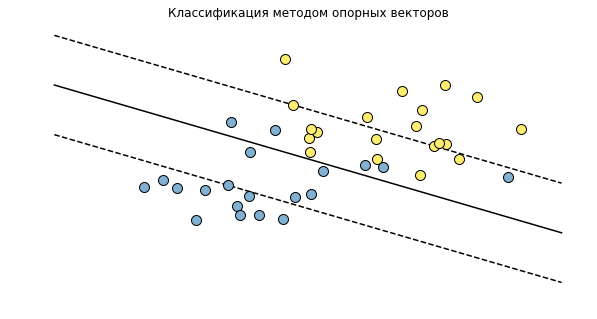

In [391]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(120)
X = np.r_[np.random.randn(20, 2) - [np.random.uniform(0,2), np.random.uniform(0,2)], np.random.randn(20, 2) + [np.random.uniform(0,2), np.random.uniform(0,3)]]* 1.5
Y = [0]*20 + [1]*20
cl = [color[4]] * 20 + [color[11]] * 20
# Y = np.array(Y).reshape(1,len(Y), 3)
# figure number
fignum = 1
print()
print()
# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(10, 5))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none',c = color[3], zorder=10, edgecolors='k')
    for i in range(len(X)):
        plt.scatter(X[i, 0], X[i, 1],s = 100, c = cl[i], zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
#     Z = Z.reshape(XX.shape)
#     plt.figure(fignum, figsize=(4, 3))
#     plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

#     plt.xlim(x_min, x_max)
#     plt.ylim(y_min, y_max)

#     plt.xticks(())
#     plt.yticks(())
#     fignum = fignum + 1
plt.title('Классификация методом опорных векторов')
plt.axis('off')
plt.show()
print()
print()

In [399]:
import seaborn as sns
import pandas as pd

In [400]:
sdml_exp = [0.5,   0.88,  0.44,  0.9,   0.75,  0.8 ,  0.6,   0.55,  0.7,   0.85]
sdml_inn = [0.5,   0.8 ,  0.56,  0.9,   0.65,  0.85,  0.6,   0.8 ,  0.8,   0.9]
lmnn_inn = [0.46666667,  0.96  ,      0.64  ,      0.9      ,   0.65    ,    0.8   ,      0.65,0.8     ,    0.75    ,    0.9 ]
lmnn_exp = [0.4 ,  0.76,  0.52,  0.8 ,  0.75,  0.7,  0.7,   0.5 ,  0.7 ,  0.85]
svc_score =[0.6 ,0.72 ,0.68 ,0.6 ,0.9 ,0.55 ,0.7 ,0.65 ,0.65 ,0.95 ]

In [401]:
score = [lmnn_inn, sdml_inn, sdml_exp, lmnn_exp, svc_score]

In [402]:
score_dic = ['LMNN_inn',
            'SDML_inn',
             'SDML_exp',
             'LMNN_exp',
            'baseline']

In [403]:
new_sns = pd.DataFrame(columns=['method', 'ROC AUC'])

for idx, one in enumerate(score_dic):
    for i in range(10):
        ss = pd.DataFrame(data =[[one, score[idx][i]]], columns=['method', 'ROC AUC'])
        new_sns = new_sns.append(ss)

new_sns.head()

,method,ROC AUC
0,LMNN_inn,0.466667
0,LMNN_inn,0.960000
0,LMNN_inn,0.640000
0,LMNN_inn,0.900000
0,LMNN_inn,0.650000


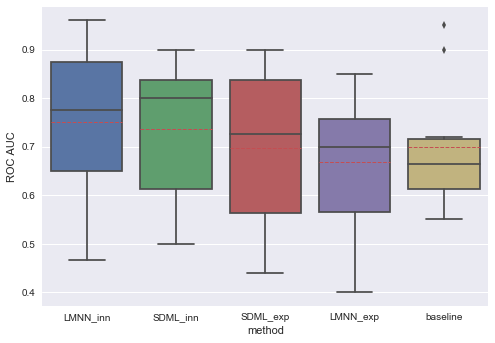

In [406]:
sns.boxplot(x="method", y="ROC AUC", data=new_sns, meanline = True, showmeans=True )#shownotches = False)